<a href="https://colab.research.google.com/github/huangcoder/python-learning/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load datasets from Kaggle

In [ ]:
!pip install kaggle

In [ ]:
!mkdir .kaggle

In [ ]:
import json
token = {"username":"huangcoder","key":"a8700ce8a034c7046ceb379c516799bb"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

cp: cannot create regular file '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle config set -n path -v{/content}

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud -p /content

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!unzip \*.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [ ]:
pip install deep-forest

     |████████████████████████████████| 2.4MB 7.3MB/s 


# Load datasets from Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


filepath: /content/drive/MyDrive/Colab Notebooks/creditcard.csv

In [2]:
pip install deep-forest

     |████████████████████████████████| 2.4MB 8.0MB/s 


# 0 Data Describe


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as sklearn

## import model
from sklearn.tree import DecisionTreeClassifier  ## CART
from sklearn.ensemble import RandomForestClassifier, VotingClassifier  ##RF
import xgboost as xgb ##XGB
import lightgbm as lgb  ##LGB
from deepforest import CascadeForestClassifier  ##DF

from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.recurrent import LSTM


from scipy.stats import norm
from sklearn.utils import resample
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold



from sklearn.metrics import confusion_matrix, classification_report, recall_score, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score, f1_score, accuracy_score, precision_score
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
df=pd.read_csv("/content/drive/MyDrive/creditcard.csv")
df.head()  ##Return the first 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()   ## Generate descriptive statistics.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# 1 Data Analysis - by  Jiajie Xiong

In [ ]:
# Good No Null Values!
df.isnull().sum().max()

0

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

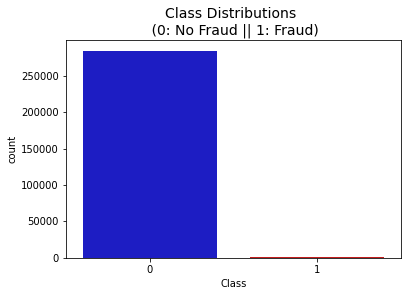

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

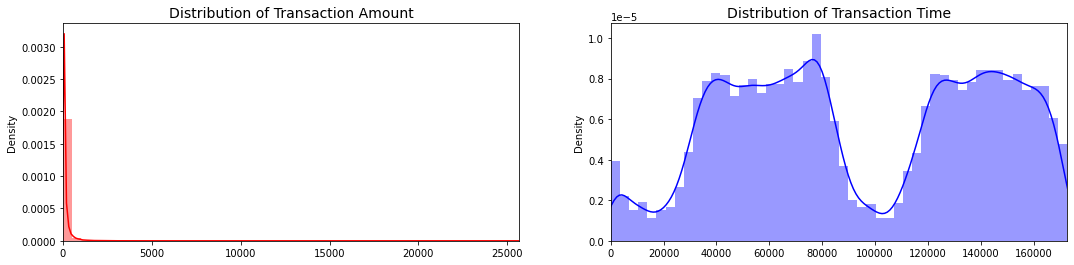

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

n_estimators= 14,
           max_depth= 32,
           min_samples_split=2,
           min_samples_leaf=1,
           max_leaf_nodes=294, 
           min_weight_fraction_leaf = 0

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

# 2 Use Smote to split datasets - by Yu lin

## Conclusion
无需检验说明，直接采用Smote方法，原因是Smote方法针对非平衡数据，具有提升精确度、召回率的作用

In [ ]:
# ## Default Method
# df=df.drop(['Amount','Time'],axis=1)
# X = df.drop(columns = 'Class')
# y = df['Class']
# #Split data into train and test
# X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.3, random_state = 1)

In [ ]:
def results(balancing_technique):
    print(balancing_technique)
   
    model_name = ["CART"]

    CARTC = DecisionTreeClassifier(random_state = 1)

    for clf,i in zip([CARTC], model_name):
        model = clf.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:,1]
        print("#"*25,i,"#"*25)
        print("Training Accuracy = {:.3f}".format(model.score(X_train, y_train)))
        print("Test Accuracy = {:.3f}".format(model.score(X_test, y_test)))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        # ADD recall todo
        print("Recall_score : %.6f" % (recall_score(y_test, y_pred)))
        

In [ ]:
results("Default Split Without Balancing")

Default Split Without Balancing
######################### CART #########################
Training Accuracy = 1.000
Test Accuracy = 0.999
ROC_AUC_score : 0.862734
Recall_score : 0.725926


In [ ]:
# ## Smote method
# sm = SMOTE(random_state = 1)
# X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
# X_test_sm = np.array(X_test)
# y_test_sm = np.array(y_test)

In [ ]:
def results_smote(balancing_technique):
    print(balancing_technique)
   
    model_name = ["CART"]

    CARTC = DecisionTreeClassifier(random_state = 1)

    for clf,i in zip([CARTC], model_name):
        model = clf.fit(X_train_sm, y_train_sm)
        y_pred = model.predict(X_test_sm)
        y_pred_prob = model.predict_proba(X_test)[:,1]
        print("#"*25,i,"#"*25)
        print("Training Accuracy = {:.3f}".format(model.score(X_train_sm, y_train_sm)))
        print("Test Accuracy = {:.3f}".format(model.score(X_test_sm, y_test_sm)))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test_sm, y_pred)))
        # ADD recall todo
        print("Recall_score : %.6f" % (recall_score(y_test_sm, y_pred)))
        

In [ ]:
results_smote("Balanced With SMOTE")

Balanced With SMOTE
######################### CART #########################
Training Accuracy = 1.000
Test Accuracy = 0.997
ROC_AUC_score : 0.850691
Recall_score : 0.703704


# 3 Model Training



## 5种模型

In [5]:
X = df.drop(columns = 'Class')
y = df['Class']
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, stratify=y, test_size = 0.25, random_state = 1)
sm = SMOTE(random_state = 1)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
X_test_sm = np.array(X_test)
y_test_sm = np.array(y_test)

In [6]:
# Model definition
CARTC = DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=3
                                  ,splitter="random"
                                  ,max_depth=7)
RFC = RandomForestClassifier(random_state=3)
XGBC = XGBClassifier(
        n_estimators=2977,
        max_depth=13,
        min_child_weight=1,
        learning_rate=0.057,
        subsample=0.82,
        colsample_bytree=0.66,
        gamma=1,
        n_jobs=-1,
        n_thread=-1,
        tree_method='gpu_hist',  #gpu_hist is really fast
        objective='binary:logistic')
LGBC = LGBMClassifier(boosting_type='gbdt',
                          class_weight=None,
                          colsample_bytree=0.5112837457460335,
                          importance_type='split',
                          learning_rate=0.02,
                          max_depth=7,
                          metric='None',
                          min_child_samples=195,
                          min_child_weight=0.01,
                          min_split_gain=0.0,
                          n_estimators=3000,
                          n_jobs=4,
                          num_leaves=44,
                          objective=None,
                          random_state=42,
                          reg_alpha=2,
                          reg_lambda=10,
                          silent=True,
                          subsample=0.8137506311449016,
                          subsample_for_bin=200000,
                          subsample_freq=0)
DEEPF = CascadeForestClassifier(use_predictor='True',
                                    predictor="forest",
                                    n_bins=173,n_estimators=6,
                                    n_trees=1000,
                                    min_samples_leaf=1,
                                    partial_mode='True',
                                    delta=1.4142915557953846e-05,
                                    verbose=1,
                                    random_state=33)



In [7]:
#用来跑SMOTE处理后的全模型对比图
def results_sm_graph(balancing_technique):
    print(balancing_technique)
    fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
    model_name = ["CART","RF", "XGB", "LGB","DF"]
    

    
    for clf,i in zip([CARTC,RFC,XGBC,LGBC,DEEPF], model_name):
      if i != "DF" :
        model=clf.fit(X_train_sm, y_train_sm)
      else  :
        model=clf
        clf.fit(X_train_sm, y_train_sm)

      y_pred = model.predict(X_test_sm)
      y_pred_prob = model.predict_proba(X_test_sm)[:,1]
          
      print("#"*25,i,"#"*25)
      print("Training Accuracy = {:.3f}".format(model.score(X_train_sm, y_train_sm)))
      print("Test Accuracy = {:.3f}".format(model.score(X_test_sm, y_test_sm)))
      print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test_sm, y_pred)))
      #Confusion Matrix
      print(confusion_matrix(y_test_sm, y_pred))
      print("-"*15,"CLASSIFICATION REPORT","-"*15)
      print(classification_report(y_test_sm, y_pred))
          
          
      #precision-recall curve
      precision, recall, thresholds_pr = precision_recall_curve(y_test_sm, y_pred_prob)
      avg_pre = average_precision_score(y_test_sm, y_pred_prob)
      ax1.plot(precision, recall, label = i+ " average precision = {:0.3f}".format(avg_pre), lw = 3, alpha = 0.7)
          
          
      ax1.set_xlabel('Precision', fontsize = 14)
      ax1.set_ylabel('Recall', fontsize = 14)
      ax1.set_title('Precision-Recall Curve', fontsize = 18)
      ax1.legend(loc = 'best')
      #find default threshold
      close_default = np.argmin(np.abs(thresholds_pr - 0.5))
      ax1.plot(precision[close_default], recall[close_default], 'o', markersize = 8)

      #roc-curve
      fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
      roc_auc = auc(fpr,tpr)
      ax2.plot(fpr,tpr, label = i+ " area = {:0.4f}".format(roc_auc), lw = 3, alpha = 0.7)
      ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
      ax2.set_xlabel("False Positive Rate", fontsize = 14)
      ax2.set_ylabel("True Positive Rate", fontsize = 14)
      ax2.set_title("ROC Curve", fontsize = 18)
      ax2.legend(loc = 'best')
      #find default threshold
      close_default = np.argmin(np.abs(thresholds_roc - 0.5))
      ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
      plt.tight_layout()

In [1]:
results_sm_graph("Model Collection - SMOTE")

NameError: ignored

## 7种模型

SMOTE方法

In [ ]:
X = df.drop(columns = 'Class')
y = df['Class']
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, stratify=y, test_size = 0.25, random_state = 1)
sm = SMOTE(random_state = 1)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
X_test_sm = np.array(X_test)
y_test_sm = np.array(y_test)

In [ ]:
# Model definition
CARTC = DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=3
                                  ,splitter="random"
                                  ,max_depth=7)
RFC = RandomForestClassifier(random_state=3)
XGBC = XGBClassifier(
        n_estimators=2977,
        max_depth=13,
        min_child_weight=1,
        learning_rate=0.057,
        subsample=0.82,
        colsample_bytree=0.66,
        gamma=1,
        n_jobs=-1,
        n_thread=-1,
        tree_method='gpu_hist',  #gpu_hist is really fast
        objective='binary:logistic')
LGBC = LGBMClassifier(boosting_type='gbdt',
                          class_weight=None,
                          colsample_bytree=0.5112837457460335,
                          importance_type='split',
                          learning_rate=0.02,
                          max_depth=7,
                          metric='None',
                          min_child_samples=195,
                          min_child_weight=0.01,
                          min_split_gain=0.0,
                          n_estimators=3000,
                          n_jobs=4,
                          num_leaves=44,
                          objective=None,
                          random_state=42,
                          reg_alpha=2,
                          reg_lambda=10,
                          silent=True,
                          subsample=0.8137506311449016,
                          subsample_for_bin=200000,
                          subsample_freq=0)
DEEPF = CascadeForestClassifier(use_predictor='True',
                                    predictor="forest",
                                    n_bins=173,n_estimators=6,
                                    n_trees=1000,
                                    min_samples_leaf=1,
                                    partial_mode='True',
                                    delta=1.4142915557953846e-05,
                                    verbose=1,
                                    random_state=33)
DFXGBC = CascadeForestClassifier(use_predictor='True',
                                    predictor="forest",
                                    n_bins=173,n_estimators=6,
                                    n_trees=1000,
                                    min_samples_leaf=1,
                                    partial_mode='True',
                                    delta=1.4142915557953846e-05,
                                    verbose=1,
                                    random_state=33)
DFLGBC = CascadeForestClassifier(use_predictor='True',
                                    predictor="forest",
                                    n_bins=173,n_estimators=6,
                                    n_trees=1000,
                                    min_samples_leaf=1,
                                    partial_mode='True',
                                    delta=1.4142915557953846e-05,
                                    verbose=1,
                                    random_state=33)



In [ ]:
VOTING = VotingClassifier (
        estimators = [('xgb', XGBC), ('lgb', LGBC),('rf',RFC)],
                     voting='soft', weights = [1, 1, 1])

In [ ]:
xgb_test = XGBC
xgb_test.fit(X_train_sm, y_train_sm)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.66, gamma=1,
              learning_rate=0.057, max_delta_step=0, max_depth=13,
              min_child_weight=1, missing=None, n_estimators=2977, n_jobs=-1,
              n_thread=-1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.82, tree_method='gpu_hist',
              verbosity=1)

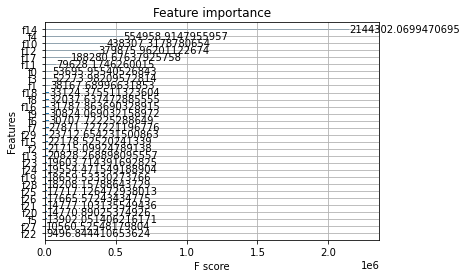

In [ ]:
xgb.plot_importance(xgb_test,max_num_features=30,importance_type='total_gain')

In [ ]:
X_train_xgbDF = np.delete(X_train_sm, [22,27,5,20,21,26], axis=1) 
X_test_xgbDF = np.delete(X_train_sm, [22,27,5,20,21,26], axis=1) 

In [ ]:
lgb_test = LGBC
lgb_test.fit(X_train_sm, y_train_sm)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.5112837457460335, importance_type='split',
               learning_rate=0.02, max_depth=7, metric='None',
               min_child_samples=195, min_child_weight=0.01, min_split_gain=0.0,
               n_estimators=3000, n_jobs=4, num_leaves=44, objective=None,
               random_state=42, reg_alpha=2, reg_lambda=10, silent=True,
               subsample=0.8137506311449016, subsample_for_bin=200000,
               subsample_freq=0)

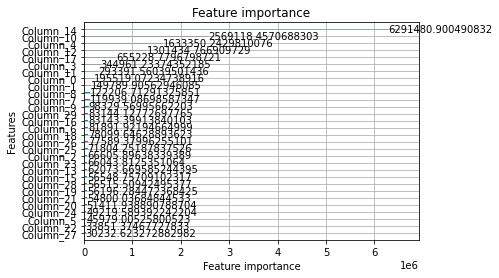

In [ ]:
lgb.plot_importance(lgb_test,max_num_features=30,importance_type='gain')

In [ ]:
X_train_lgbDF = np.delete(X_train_sm, [22,27,5,20,24,21], axis=1) 
X_test_lgbDF = np.delete(X_train_sm, [22,27,5,20,24,21], axis=1) 

In [ ]:
def prediction(model,train_data_x,train_data_y,test_data_x,test_data_y,model_name):
  model.fit(train_data_x,train_data_y)
  global y_pred,y_pred_prob
  y_pred = model.predict(test_data_x)
  y_pred_prob = model.predict_proba(test_data_x)[:, 1]
  print("#" * 25, model_name, "#" * 25)
  print("Training Accuracy = {:.3f}".format(
            model.score(train_data_x, train_data_y)))
  print("Test Accuracy = {:.3f}".format(model.score(
      test_data_x, test_data_y)))
  print("ROC_AUC_score : %.6f" % (roc_auc_score(test_data_y, y_pred)))
  #Confusion Matrix
  print(confusion_matrix(test_data_y, y_pred))
  print("-" * 15, "CLASSIFICATION REPORT", "-" * 15)
  print(classification_report(test_data_y, y_pred))

In [ ]:
def curve(valid,pred,prob,model_name):
  #precision-recall curve
  precision, recall, thresholds_pr = precision_recall_curve(
      valid, prob)
  avg_pre = average_precision_score(valid, prob)
  ax1.plot(precision,
            recall,
            label=model_name + " average precision = {:0.2f}".format(avg_pre),
            lw=3,
            alpha=0.7)

  ax1.set_xlabel('Precision', fontsize=14)
  ax1.set_ylabel('Recall', fontsize=14)
  ax1.set_title('Precision-Recall Curve', fontsize=18)
  ax1.legend(loc='best')
  #find default threshold
  close_default = np.argmin(np.abs(thresholds_pr - 0.5))
  ax1.plot(precision[close_default],
            recall[close_default],
            'o',
            markersize=8)

  #roc-curve
  fpr, tpr, thresholds_roc = roc_curve(valid, prob)
  roc_auc = auc(fpr, tpr)
  ax2.plot(fpr,
            tpr,
            label=model_name + " area = {:0.2f}".format(roc_auc),
            lw=3,
            alpha=0.7)
  ax2.plot([0, 1], [0, 1], 'r', linestyle="--", lw=2)
  ax2.set_xlabel("False Positive Rate", fontsize=14)
  ax2.set_ylabel("True Positive Rate", fontsize=14)
  ax2.set_title("ROC Curve", fontsize=18)
  ax2.legend(loc='best')
  #find default threshold
  close_default = np.argmin(np.abs(thresholds_roc - 0.5))
  ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize=8)
  plt.tight_layout()

In [ ]:
CART_PRE = prediction(CARTC,X_train_sm,y_train_sm,X_test_sm,y_test_sm,"CART")
CART_pred = y_pred
CART_pred_prob = y_pred_prob

######################### CART #########################
Training Accuracy = 0.942
Test Accuracy = 0.945
ROC_AUC_score : 0.935720
[[67142  3937]
 [    9   114]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     71079
           1       0.03      0.93      0.05       123

    accuracy                           0.94     71202
   macro avg       0.51      0.94      0.51     71202
weighted avg       1.00      0.94      0.97     71202



In [ ]:
RF_PRE = prediction(RFC,X_train_sm,y_train_sm,X_test_sm,y_test_sm,"RF")
RF_pred = y_pred
RF_pred_prob = y_pred_prob

######################### RF #########################
Training Accuracy = 1.000
Test Accuracy = 1.000
ROC_AUC_score : 0.942991
[[71065    14]
 [   14   109]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.89      0.89      0.89       123

    accuracy                           1.00     71202
   macro avg       0.94      0.94      0.94     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
XGB_PRE = prediction(XGBC,X_train_sm,y_train_sm,X_test_sm,y_test_sm,"XGB")
XGB_pred = y_pred
XGB_pred_prob = y_pred_prob

######################### XGB #########################
Training Accuracy = 1.000
Test Accuracy = 1.000
ROC_AUC_score : 0.938947
[[71068    11]
 [   15   108]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.91      0.88      0.89       123

    accuracy                           1.00     71202
   macro avg       0.95      0.94      0.95     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
LGB_PRE = prediction(LGBC,X_train_sm,y_train_sm,X_test_sm,y_test_sm,"LGB")
LGB_pred = y_pred
LGB_pred_prob = y_pred_prob

######################### LGB #########################
Training Accuracy = 1.000
Test Accuracy = 1.000
ROC_AUC_score : 0.947042
[[71063    16]
 [   13   110]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.87      0.89      0.88       123

    accuracy                           1.00     71202
   macro avg       0.94      0.95      0.94     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
VOTING_PRE = prediction(VOTING,X_train_sm,y_train_sm,X_test_sm,y_test_sm,"VOTING")
VOTING_pred = y_pred
VOTING_pred_prob = y_pred_prob

######################### VOTING #########################
Training Accuracy = 1.000
Test Accuracy = 1.000
ROC_AUC_score : 0.942998
[[71066    13]
 [   14   109]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.89      0.89      0.89       123

    accuracy                           1.00     71202
   macro avg       0.95      0.94      0.94     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
DF_PRE = prediction(DEEPF,X_train_sm,y_train_sm,X_test_sm,y_test_sm,"DF")
DF_pred = y_pred
DF_pred_prob = y_pred_prob

NameError: ignored

In [ ]:
DFXGB_PRE = prediction(DFXGB,X_train_xgbDF,y_train_sm,X_test_xgbDF,y_test_sm,"DFXGB")
DFXGB_pred = y_pred
DFXGB_pred_prob = y_pred_prob

In [ ]:
DFLGB_PRE = prediction(DFLGB,X_train_lgbDF,y_train_sm,X_test_lgbDF,y_test_sm,"DFLGB")
DFLGB_pred = y_pred
DFLGB_pred_prob = y_pred_prob

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
curve(y_test_sm,CART_pred,CART_pred_prob,"CART")
curve(y_test_sm,RF_pred,RF_pred_prob,"RF")
curve(y_test_sm,XGB_pred,XGB_pred_prob,"XGB")
curve(y_test_sm,LGB_pred,LGB_pred_prob,"LGB")
curve(y_test_sm,DF_pred,DF_pred_prob,"DF")
curve(y_test_sm,DFXGB_pred,DFXGB_pred_prob,"DFXGB")
curve(y_test_sm,DFLGB_pred,DFLGB_pred_prob,"DFLGB")
curve(y_test_sm,VOTING_pred,VOTING_pred_prob,"VOTING")

In [ ]:
#用来跑SMOTE处理后的全模型对比图
def results_sm_graph(balancing_technique):
    print(balancing_technique)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    model_name = ["CART", "RF", "XGB", "LGB", "DF","DF_XGB","DF_LGB","VOTING"]
    

    for clf, i in zip([CARTC, RFC, XGBC, LGBC, DEEPF,DFXGBC,DFLGBC,VOTING], model_name):
        if i == "DF":
            model = clf
            clf.fit(X_train_sm, y_train_sm)
        
        elif i == "DF_XGB":
            model = clf
            clf.fit(X_train_xgbDF,y_train_sm)
        elif i == "DF_LGB":
            model = clf
            clf.fit(X_train_lgbDF,y_train_sm)
            
        else:
            
            model = clf.fit(X_train_sm, y_train_sm)

        if i == "DF_XGB":
          y_pred = model.predict(X_test_xgbDF)
          y_pred_prob = model.predict_proba(X_test_xgbDF)[:, 1]
        elif i == "DF_LGB":
          y_pred = model.predict(X_test_lgbDF)
          y_pred_prob = model.predict_proba(X_test_lgbDF)[:, 1]
        else:
          y_pred = model.predict(X_test_sm)
          y_pred_prob = model.predict_proba(X_test_sm)[:, 1]

        print("#" * 25, i, "#" * 25)
        print("Training Accuracy = {:.3f}".format(
            model.score(X_train_sm, y_train_sm)))
        print("Test Accuracy = {:.3f}".format(model.score(
            X_test_sm, y_test_sm)))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test_sm, y_pred)))
        #Confusion Matrix
        print(confusion_matrix(y_test_sm, y_pred))
        print("-" * 15, "CLASSIFICATION REPORT", "-" * 15)
        print(classification_report(y_test_sm, y_pred))

        #precision-recall curve
        precision, recall, thresholds_pr = precision_recall_curve(
            y_test_sm, y_pred_prob)
        avg_pre = average_precision_score(y_test_sm, y_pred_prob)
        ax1.plot(precision,
                 recall,
                 label=i + " average precision = {:0.2f}".format(avg_pre),
                 lw=3,
                 alpha=0.7)

        ax1.set_xlabel('Precision', fontsize=14)
        ax1.set_ylabel('Recall', fontsize=14)
        ax1.set_title('Precision-Recall Curve', fontsize=18)
        ax1.legend(loc='best')
        #find default threshold
        close_default = np.argmin(np.abs(thresholds_pr - 0.5))
        ax1.plot(precision[close_default],
                 recall[close_default],
                 'o',
                 markersize=8)

        #roc-curve
        fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        ax2.plot(fpr,
                 tpr,
                 label=i + " area = {:0.2f}".format(roc_auc),
                 lw=3,
                 alpha=0.7)
        ax2.plot([0, 1], [0, 1], 'r', linestyle="--", lw=2)
        ax2.set_xlabel("False Positive Rate", fontsize=14)
        ax2.set_ylabel("True Positive Rate", fontsize=14)
        ax2.set_title("ROC Curve", fontsize=18)
        ax2.legend(loc='best')
        #find default threshold
        close_default = np.argmin(np.abs(thresholds_roc - 0.5))
        ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize=8)
        plt.tight_layout()


Model Collection - SMOTE
######################### CART #########################
Training Accuracy = 0.942
Test Accuracy = 0.945
ROC_AUC_score : 0.935720
[[67142  3937]
 [    9   114]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     71079
           1       0.03      0.93      0.05       123

    accuracy                           0.94     71202
   macro avg       0.51      0.94      0.51     71202
weighted avg       1.00      0.94      0.97     71202

######################### RF #########################
Training Accuracy = 1.000
Test Accuracy = 1.000
ROC_AUC_score : 0.942991
[[71065    14]
 [   14   109]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.89      0.89      0.89       123

    accuracy                           1.00     71202
  

KeyboardInterrupt: ignored

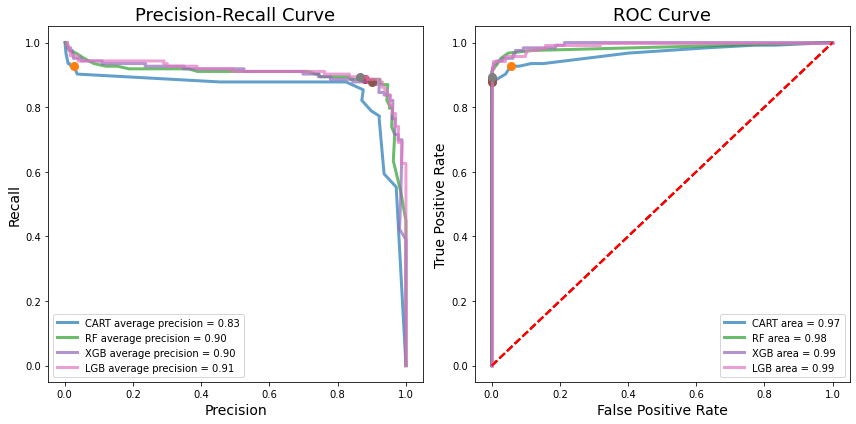

In [ ]:
results_sm_graph("Model Collection - SMOTE")

以下无需执行

数据集删除V22~V26，验证结果（数据已经过PCA，这一步没必要）

In [ ]:
df=df.drop(['V22','V23','V24','V25','V26'],axis=1)
X = df.drop(columns = 'Class')
y = df['Class']
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.3, random_state = 1)
sm = SMOTE(random_state = 1)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
X_test_sm = np.array(X_test)
y_test_sm = np.array(y_test)

In [ ]:
#用来跑SMOTE处理后的全模型对比图
def results_sm_graph(balancing_technique):
    print(balancing_technique)
    fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
    model_name2 = ["CART","RF", "XGB", "LGB","DF"]
    CARTC = DecisionTreeClassifier(random_state = 3)
    RFC = RandomForestClassifier(random_state = 3)
    XGBC = XGBClassifier(random_state = 3)
    LGBC= LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.5112837457460335, importance_type='split',
        learning_rate=0.02, max_depth=7, metric='None',
        min_child_samples=195, min_child_weight=0.01, min_split_gain=0.0,
        n_estimators=3000, n_jobs=4, num_leaves=44, objective=None,
        random_state=42, reg_alpha=2, reg_lambda=10, silent=True,
        subsample=0.8137506311449016, subsample_for_bin=200000,
        subsample_freq=0)
    DEEPF = CascadeForestClassifier(random_state=3)

    
    for clf2,i in zip([CARTC,RFC,XGBC,LGBC,DEEPF], model_name2):
      if i != "DF" :
        model=clf2.fit(X_train_sm, y_train_sm)
      else  :
        model=clf2
        clf2.fit(X_train_sm, y_train_sm)

        y_pred = model.predict(X_test_sm)
        y_pred_prob = model.predict_proba(X_test_sm)[:,1]
        
        print("#"*25,i,"#"*25)
        print("Training Accuracy = {:.3f}".format(model.score(X_train_sm, y_train_sm)))
        print("Test Accuracy = {:.3f}".format(model.score(X_test_sm, y_test_sm)))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test_sm, y_pred)))
        #Confusion Matrix
        print(confusion_matrix(y_test_sm, y_pred))
        print("-"*15,"CLASSIFICATION REPORT","-"*15)
        print(classification_report(y_test_sm, y_pred))
        
        
        #precision-recall curve
        precision, recall, thresholds_pr = precision_recall_curve(y_test_sm, y_pred_prob)
        avg_pre = average_precision_score(y_test_sm, y_pred_prob)
        ax1.plot(precision, recall, label = i+ " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
        
        
        ax1.set_xlabel('Precision', fontsize = 14)
        ax1.set_ylabel('Recall', fontsize = 14)
        ax1.set_title('Precision-Recall Curve', fontsize = 18)
        ax1.legend(loc = 'best')
        #find default threshold
        close_default = np.argmin(np.abs(thresholds_pr - 0.5))
        ax1.plot(precision[close_default], recall[close_default], 'o', markersize = 8)

        #roc-curve
        fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr,tpr)
        ax2.plot(fpr,tpr, label = i+ " area = {:0.2f}".format(roc_auc), lw = 3, alpha = 0.7)
        ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
        ax2.set_xlabel("False Positive Rate", fontsize = 14)
        ax2.set_ylabel("True Positive Rate", fontsize = 14)
        ax2.set_title("ROC Curve", fontsize = 18)
        ax2.legend(loc = 'best')
        #find default threshold
        close_default = np.argmin(np.abs(thresholds_roc - 0.5))
        ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
        plt.tight_layout()

Model Collection - Original
######################### CART #########################
Training Accuracy = 1.000
Test Accuracy = 0.999
ROC_AUC_score : 0.859007
[[85265    43]
 [   38    97]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.69      0.72      0.71       135

    accuracy                           1.00     85443
   macro avg       0.85      0.86      0.85     85443
weighted avg       1.00      1.00      1.00     85443

######################### RF #########################
Training Accuracy = 1.000
Test Accuracy = 0.999
ROC_AUC_score : 0.877702
[[85295    13]
 [   33   102]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.89      0.76      0.82       135

    accuracy                           1.00     85443

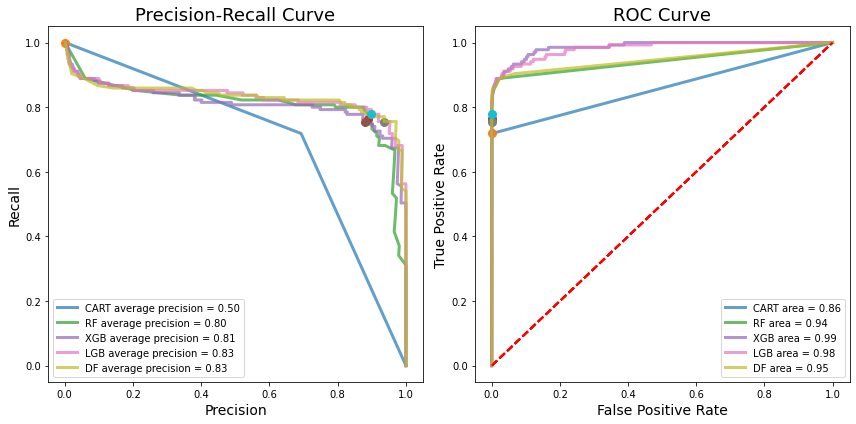

In [ ]:
results_graph("Model Collection - Original")

# 4 Model Tuning

## 4.1 Tuning parameters - by Zhaoxing Weng

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb_model = xgb.XGBClassifier(
    learning_rate=0.1,
    gamma= 0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    ##"nthread=4,
    scale_pos_weight=1,
    n_estimators=xgb_cv.shape[0], 
    seed=0,
    nthread=-1
)

xgb_params = {
    "max_depth":range(3, 10, 2),
    "min_child_weight":range(1, 6, 2),
}

grid = GridSearchCV(xgb_model, param_grid=xgb_params, cv=5, scoring='roc_auc')
grid.fit(X_train_sm, y_train_sm)

In [ ]:
print(grid.best_params_)
test_predict1 = grid.predict(X_test_sm)

print("accuracy_score:"+str(accuracy_score(y_test_sm, test_predict1)))

In [ ]:
xgb_params2 = {
    "max_depth":range(2, 4),
    "min_child_weight":range(4, 6),
}

grid2 = GridSearchCV(xgb_model, param_grid=xgb_params2, cv=5, scoring='roc_auc')
grid2.fit(X_train, y_train)

print(grid2.best_params_)
test_predict2 = grid2.predict(X_test_sm)

print("accuracy_score:"+str(accuracy_score(y_test_sm, test_predict2)))

In [ ]:
dtrain = xgb.DMatrix(X_train_sm, label=y_train_sm)
xgb_cv = xgb.cv(params=grid.best_estimator_.get_params(), dtrain=dtrain, num_boost_round=1000, early_stopping_rounds=50, metrics="auc", nfold=5, show_stdv=False)
print(xgb_cv.shape[0])

In [ ]:
xgb_model2 = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=5, 
    gamma= 0,
    objective='binary:logistic',
    ##"nthread=4,
    scale_pos_weight=1,
    n_estimators=xgb_cv.shape[0], 
    seed=0,
    nthread=-1
)

xgb_params3 = {
    "subsample":np.arange(0.3, 1, 0.1),
    "colsample_bytree":np.arange(0.3, 1, 0.1)
}

grid3 = GridSearchCV(xgb_model2, param_grid=xgb_params3, cv=5)
grid3.fit(X_train_sm, y_train_sm)

print(grid3.best_params_)
test_predict3 = grid3.predict(X_test_sm)

print("accuracy_score:"+str(accuracy_score(y_test_sm, test_predict3)))    

In [ ]:
xgb_params4 = {
    "subsample":np.arange(0.8, 1, 0.05),
    "colsample_bytree":np.arange(0.45, 0.55, 0.05)
}

grid4 = GridSearchCV(xgb_model2, param_grid=xgb_params4, cv=5)
grid4.fit(X_train_sm, y_train_sm)

print(grid4.best_params_)
test_predict4 = grid4.predict(X_test_sm)

print("accuracy_score:"+str(accuracy_score(y_test_sm, test_predict4)))   

In [ ]:
xgb_model3 = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=5, 
    colsample_bytree=0.5, 
    subsample=0.85, 
    gamma= 0,
    objective='binary:logistic',
    ##"nthread=4,
    scale_pos_weight=1,
    n_estimators=xgb_cv.shape[0], 
    seed=0,
    nthread=-1
)

xgb_params5 = {
    "reg_alpha":[0.1, 1],
    "reg_lambda":[0.5, 1, 2]
}

grid5 = GridSearchCV(xgb_model3, param_grid=xgb_params5, cv=5)
grid5.fit(X_train_sm, y_train_sm)

print(grid5.best_params_)
test_predict5 = grid5.predict(X_test_sm)

print("accuracy_score:"+str(accuracy_score(y_test_sm, test_predict5)))

In [ ]:
best_params, tuning_history = dict(), list()
booster = lgb.train(params, dtrain, valid_sets=dval,
                    verbose_eval=0,
                    best_params=best_params,
                    tuning_history=tuning_history)
 
print(‘Best Params:’, best_params)
print(‘Tuning history:’, tuning_history)

## 4.2 Tuning parameters LightGBM -by Deshan Huang

In [ ]:
!pip install optuna

     |████████████████████████████████| 296kB 6.3MB/s 
     |████████████████████████████████| 81kB 5.6MB/s 
     |████████████████████████████████| 163kB 16.2MB/s 
     |████████████████████████████████| 112kB 19.6MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 143kB 18.2MB/s 
     |████████████████████████████████| 81kB 6.5MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=9f4c05ea6c147414cc9fd34c419cd230a35e7a2f1363589667178851cd21b01b
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


In [ ]:
import optuna 

# LightGBM Tuner: New Optuna Integration for Hyperparameter Optimization 
# https://medium.com/optuna/lightgbm-tuner-new-optuna-integration-for-hyperparameter-optimization-8b7095e99258
import optuna.integration.lightgbm as lgb

In [ ]:
## train_x, test_x, train_y, test_y = train_test_split(X.values, y.values, test_size = 0.25, random_state = 1)

In [ ]:
def objective(trial):
    # data, target = sklearn.datasets.load_breast_cancer(return_X_y=True)
    
    train_x, test_x, train_y, test_y = train_test_split(X.values, y.values, test_size = 0.25, random_state = 1)
    sm = SMOTE(random_state = 1)
    X_train_sm, y_train_sm = sm.fit_sample(train_x, train_y)
    X_test_sm = np.array(test_x)
    y_test_sm = np.array(test_y)
    dtrain = lgb.Dataset(X_train_sm, label=y_train_sm)

    param = {
        'objective': 'binary',
        'is_unbalance': True,   #set this to true if training data are unbalanced
        'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),  #control the complexity of the tree model.
        'min_data_in_leaf':trial.suggest_int('min_data_in_leaf',1, 1000),   #prevent over-fitting in a leaf-wise tree. 
        'max_depth': trial.suggest_int('max_depth', 5, 15),  #limit the tree depth explicitly.
        'metric': 'binary_logloss',   #set evaluation metric
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),  #k means perform bagging at every k iteration
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-4, 1), #affects on normalization weights of dropped trees
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),  #to enable bagging, bagging_fraction should be set to value smaller than 1.0 as well

        'verbosity': -1,  #controls the level of LightGBM’s verbosity
        'num_iterations': trial.suggest_int('num_iterations', 400, 3000),  #number of boosting iterations
        #'early_stopping_rounds': 5,    # reduce training time

        'min_child_weight':trial.suggest_int('min_child_weight', 0.1, 6),  #Deal with Over-fitting
        'feature_fraction': trial.suggest_float('feature_fraction', 0.1, 1.0),  #Deal with Over-fitting
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),   #Deal with Over-fitting
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),   #Deal with Over-fitting
        
    }
 
    
    
    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(test_x)
    pred_labels = np.rint(preds)
    avg_pre = average_precision_score(test_y, pred_labels)
    return avg_pre
 
    

   

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2021-04-02 16:14:16,038] A new study created in memory with name: no-name-6d5b142a-3298-480a-a8a0-3c1416715a4d
[I 2021-04-02 16:14:16,047] A new study created in memory with name: no-name-9644281c-48cd-4456-b08d-b83fbcc0e428
[W 2021-04-02 16:14:16,052] Trial 0 failed because of the following error: ValueError('`valid_sets` is required.')
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/optuna/_optimize.py", line 217, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-86-42627ada1fd5>", line 29, in objective
    gbm = lgb.train(param, dtrain)
  File "/usr/local/lib/python3.7/dist-packages/optuna/integration/_lightgbm_tuner/__init__.py", line 34, in train
    auto_booster = LightGBMTuner(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/optuna/integration/_lightgbm_tuner/optimize.py", line 838, in __init__
    raise ValueError("`valid_sets` is required.")
ValueError: `valid_sets` is required.


ValueError: ignored

In [ ]:
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 18
Best trial: {'num_leaves': 344, 'min_data_in_leaf': 311, 'max_depth': 8, 'bagging_freq': 6, 'learning_rate': 0.018641015812596497, 'bagging_fraction': 0.6692803577617848, 'num_iterations': 2703, 'min_child_weight': 4, 'feature_fraction': 0.39334005988251974, 'lambda_l1': 4.3057420566487456e-05, 'lambda_l2': 6.811507053948167e-06}


In [ ]:
best_params = study.best_trial.params
best_params['tree_method'] = 'gpu_hist'      #gpu_hist is really fast

In [ ]:
best_params

{'bagging_fraction': 0.6692803577617848,
 'bagging_freq': 6,
 'feature_fraction': 0.39334005988251974,
 'lambda_l1': 4.3057420566487456e-05,
 'lambda_l2': 6.811507053948167e-06,
 'learning_rate': 0.018641015812596497,
 'max_depth': 8,
 'min_child_weight': 4,
 'min_data_in_leaf': 311,
 'num_iterations': 2703,
 'num_leaves': 344,
 'tree_method': 'gpu_hist'}

In [ ]:
lgbclf = LGBMClassifier(**best_params)

CPU times: user 1min 57s, sys: 291 ms, total: 1min 57s
Wall time: 59.6 s
######################### <module 'optuna.integration.lightgbm' from '/usr/local/lib/python3.7/dist-packages/optuna/integration/lightgbm.py'> #########################
Training Accuracy = 1.000
Test Accuracy = 1.000
ROC_AUC_score : 0.873839
[[71086     5]
 [   28    83]]
--------------- CLASSIFICATION REPORT ---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.94      0.75      0.83       111

    accuracy                           1.00     71202
   macro avg       0.97      0.87      0.92     71202
weighted avg       1.00      1.00      1.00     71202



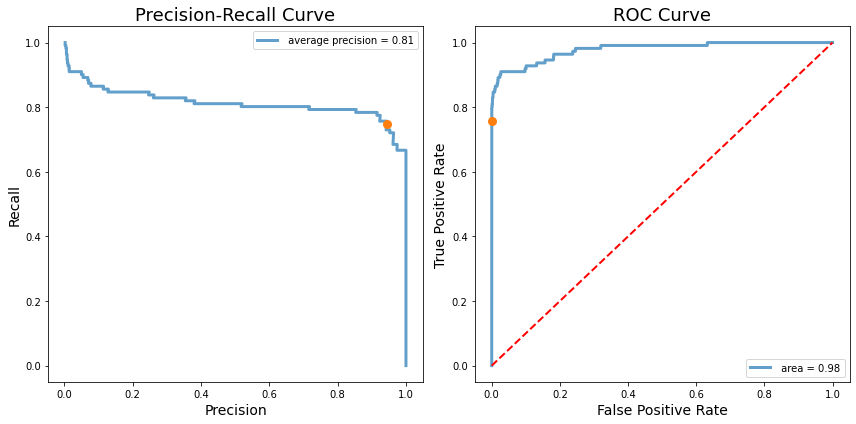

In [ ]:
%time lgbclf.fit(train_x, train_y) 

y_pred = lgbclf.predict(test_x)
y_pred_prob = lgbclf.predict_proba(test_x)[:,1]

        
print("#"*25,lgb,"#"*25)
print("Training Accuracy = {:.3f}".format(lgbclf.score(train_x, train_y)))
print("Test Accuracy = {:.3f}".format(lgbclf.score(test_x, test_y)))
print("ROC_AUC_score : %.6f" % (roc_auc_score(test_y, y_pred)))
#Confusion Matrix
print(confusion_matrix(test_y, y_pred))
print("-"*15,"CLASSIFICATION REPORT","-"*15)
print(classification_report(test_y, y_pred))


fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
#precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(test_y, y_pred_prob)
avg_pre = average_precision_score(test_y, y_pred_prob)
ax1.plot(precision, recall, label = " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
        
        
ax1.set_xlabel('Precision', fontsize = 14)
ax1.set_ylabel('Recall', fontsize = 14)
ax1.set_title('Precision-Recall Curve', fontsize = 18)
ax1.legend(loc = 'best')
#find default threshold
close_default = np.argmin(np.abs(thresholds_pr - 0.5))
ax1.plot(precision[close_default], recall[close_default], 'o', markersize = 8)

#roc-curve
fpr, tpr, thresholds_roc = roc_curve(test_y, y_pred_prob)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc), lw = 3, alpha = 0.7)
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
#find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

## 4.3 Tuning Parameters DeepFroest - by Deshan Huang
https://colab.research.google.com/drive/1SQGR46JuHkYiLOaub7U_UxnxXAb8ub3S?usp=sharing#scrollTo=33hh6ahjWE3s

In [ ]:
!pip install optuna

     |████████████████████████████████| 296kB 6.9MB/s 
     |████████████████████████████████| 163kB 17.8MB/s 
     |████████████████████████████████| 81kB 7.7MB/s 
     |████████████████████████████████| 81kB 7.4MB/s 
     |████████████████████████████████| 112kB 21.0MB/s 
     |████████████████████████████████| 143kB 19.0MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=3dbab29aa00b3cf4bbfb7d5cc880cf542cbd1b7913ab2756b9773154c6f571db
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


In [ ]:
import optuna 
import deepforest as deepf

In [ ]:
sm = SMOTE(random_state = 1)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
X_test_sm = np.array(X_test)
y_test_sm = np.array(y_test)

In [ ]:
import optuna
def objective(trial):
    
# params specifies the XGBoost hyperparameters to be tuned
    params = {
        'predictor':'forest', 
        'n_bins':trial.suggest_int('n_bins', 2, 255),
        'n_estimators': trial.suggest_int('n_estimators', 2, 6),
        'n_trees':100,
        'min_samples_leaf':trial.suggest_int('min_samples_leaf', 1, 6),
        'partial_mode':True,
        "delta": trial.suggest_float("delta", 1e-8, 10.0, log=True),
        'verbose':1

    }
    
    df_optuna = CascadeForestClassifier(**params)
    df_optuna.fit(X_train_sm,y_train_sm)
    preds = df_optuna.predict(X_test_sm)
    pred_labels = np.rint(preds)
# trials will be evaluated based on their accuracy on the test set
    average_precision = average_precision_score(y_test_sm, pred_labels)
    return average_precision

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=5) 
#You can increase n_trials parameter
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))

In [ ]:
best_params = study.best_trial.params   

In [ ]:
best_params

In [ ]:
deepfclf = CascadeForestClassifier(**best_params)

In [ ]:
%time deepfclf.fit(train_x, train_y) 

y_pred = deepfclf.predict(test_x)
y_pred_prob = deepfclf.predict_proba(test_x)[:,1]

        
print("#"*25,deepf,"#"*25)
print("Training Accuracy = {:.3f}".format(deepfclf.score(train_x, train_y)))
print("Test Accuracy = {:.3f}".format(deepfclf.score(test_x, test_y)))
print("ROC_AUC_score : %.6f" % (roc_auc_score(test_y, y_pred)))
#Confusion Matrix
print(confusion_matrix(test_y, y_pred))
print("-"*15,"CLASSIFICATION REPORT","-"*15)
print(classification_report(test_y, y_pred))


fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
#precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(test_y, y_pred_prob)
avg_pre = average_precision_score(test_y, y_pred_prob)
ax1.plot(precision, recall, label = " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
        
        
ax1.set_xlabel('Precision', fontsize = 14)
ax1.set_ylabel('Recall', fontsize = 14)
ax1.set_title('Precision-Recall Curve', fontsize = 18)
ax1.legend(loc = 'best')
#find default threshold
close_default = np.argmin(np.abs(thresholds_pr - 0.5))
ax1.plot(precision[close_default], recall[close_default], 'o', markersize = 8)

#roc-curve
fpr, tpr, thresholds_roc = roc_curve(test_y, y_pred_prob)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc), lw = 3, alpha = 0.7)
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
#find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

## 4.4 Tuning Parameters CART - by Yu Lin

In [ ]:
import optuna 
def Optimization(trail):
    criterion = trail.suggest_categorical("criterion" , ['gini','entropy'])
    max_depth = trail.suggest_int("max_depth" , 3, 22, 1)
    random_state = 3
    splitter = "random"

    scores = []
    cart = DecisionTreeClassifier(
        splitter = splitter,
        max_depth = max_depth,
        criterion= criterion,
        random_state = random_state
    )

    sm = SMOTE(random_state = 1)
    sss = StratifiedKFold(n_splits=10, random_state=3, shuffle=True)
    # ## 交叉验证划分
    for train_index, test_index in sss.split(X, y):
      print("Train:", train_index, "Test:", test_index)
      X_train, X_test = X.iloc[train_index].values, X.iloc[test_index].values
      y_train, y_test = y.iloc[train_index].values, y.iloc[test_index].values
      X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
      X_test_sm = np.array(X_test)
      y_test_sm = np.array(y_test)

      cart.fit(X_train_sm, y_train_sm)
      pred_cart=cart.predict(X_test_sm)
      pred_labels = np.rint(pred_cart)
      average_precision = average_precision_score(y_test_sm, pred_labels)
      scores.append(average_precision)

    return np.mean(average_precision)

In [ ]:

study = optuna.create_study(direction='maximize')
study.optimize(Optimization,n_trials=100) 
#You can increase n_trials parameter
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))

best_params {'n_bins': 173, 'n_estimators': 6, 'min_samples_leaf': 1, 'delta': 1.4142915557953846e-05}

        'predictor':'forest', 
        'n_bins':173,
        'n_estimators': 6,
        'n_trees':100,
        'min_samples_leaf':1,
        'partial_mode':True,
        "delta": 1.4142915557953846e-05),
        'verbose':1

# 5 Selection

In [ ]:
#跑每个模型独立的评估图
def results_graph_individual():

    model_name = ["CART","RF", "XGB", "LGB","DF"]
    # Model definition
    CARTC = DecisionTreeClassifier(criterion="entropy"
                                      ,random_state=3
                                      ,splitter="random"
                                      ,max_depth=7)
    RFC = RandomForestClassifier(random_state=3)
    XGBC = XGBClassifier(
            n_estimators=2977,
            max_depth=13,
            min_child_weight=1,
            learning_rate=0.057,
            subsample=0.82,
            colsample_bytree=0.66,
            gamma=1,
            n_jobs=-1,
            n_thread=-1,
            tree_method='gpu_hist',  #gpu_hist is really fast
            objective='binary:logistic')
    LGBC = LGBMClassifier(boosting_type='gbdt',
                              class_weight=None,
                              colsample_bytree=0.5112837457460335,
                              importance_type='split',
                              learning_rate=0.02,
                              max_depth=7,
                              metric='None',
                              min_child_samples=195,
                              min_child_weight=0.01,
                              min_split_gain=0.0,
                              n_estimators=3000,
                              n_jobs=4,
                              num_leaves=44,
                              objective=None,
                              random_state=42,
                              reg_alpha=2,
                              reg_lambda=10,
                              silent=True,
                              subsample=0.8137506311449016,
                              subsample_for_bin=200000,
                              subsample_freq=0)
    DEEPF = CascadeForestClassifier(use_predictor='True',
                                        predictor="forest",
                                        n_bins=173,n_estimators=6,
                                        n_trees=1000,
                                        min_samples_leaf=1,
                                        partial_mode='True',
                                        delta=1.4142915557953846e-05,
                                        verbose=1,
                                        random_state=33)    
     

    for clf, m_name in zip([CARTC,RFC,XGBC,LGBC,DEEPF], model_name):
      f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
      accuracy_lst = []
      precision_lst = []
      recall_lst = []
      f1_lst = []
      y_real = []
      y_proba = []

      accuracy_lst_sm = []
      precision_lst_sm = []
      recall_lst_sm = []
      f1_lst_sm = []
      y_real_sm = []
      y_proba_sm = []

      i = 0
      sss = StratifiedKFold(n_splits=10, random_state=3, shuffle=True)
      sm = SMOTE(random_state = 1)

      # 交叉验证划分
      for train_index, test_index in sss.split(X, y):
        print("Train:", train_index, "Test:", test_index)
        X_train, X_test = X.iloc[train_index].values, X.iloc[test_index].values
        y_train, y_test = y.iloc[train_index].values, y.iloc[test_index].values
        X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
        X_test_sm = np.array(X_test)
        y_test_sm = np.array(y_test)

        if m_name != "DF" :
          model=clf.fit(X_train, y_train)
        else  :
          model=clf
          clf.fit(X_train, y_train)

        probas_ = model.predict_proba(X_test)
        precision, recall, _ = precision_recall_curve(y_test, probas_[:, 1])

        # 画每条kfold下独立的PR Curve  -- Original
        ax1.plot(recall, precision, lw=1, alpha=0.3,
                 label='PR fold %d (AUC = %0.2f)' % (i, average_precision_score(y_test, probas_[:, 1])))

        y_real.append(y_test)
        y_proba.append(probas_[:, 1])
        accuracy_lst.append(accuracy_score(y_test, probas_[:, 1].round()))
        precision_lst.append(precision_score(y_test, probas_[:, 1].round()))
        recall_lst.append(recall_score(y_test, probas_[:, 1].round()))
        f1_lst.append(f1_score(y_test, probas_[:, 1].round()))

        
        if m_name != "DF" :
          model=clf.fit(X_train_sm, y_train_sm)
        else  :
          model=clf
          clf.fit(X_train_sm, y_train_sm)

        probas_ = model.predict_proba(X_test_sm)
        precision, recall, _ = precision_recall_curve(y_test_sm, probas_[:, 1])

        # 画每条kfold下独立的PR Curve  -- SMOTE
        ax2.plot(recall, precision, lw=1, alpha=0.3,
                 label='PR fold %d (AUC = %0.2f)' % (i, average_precision_score(y_test_sm, probas_[:, 1])))

        y_real_sm.append(y_test_sm)
        y_proba_sm.append(probas_[:, 1])
        accuracy_lst_sm.append(accuracy_score(y_test_sm, probas_[:, 1].round()))
        precision_lst_sm.append(precision_score(y_test_sm, probas_[:, 1].round()))
        recall_lst_sm.append(recall_score(y_test_sm, probas_[:, 1].round()))
        f1_lst_sm.append(f1_score(y_test_sm, probas_[:, 1].round()))
        

        i += 1
 

      y_real = np.concatenate(y_real)
      y_proba = np.concatenate(y_proba)

      y_real_sm = np.concatenate(y_real_sm)
      y_proba_sm = np.concatenate(y_proba_sm)

      ## 文字报告
      print("#"*25,m_name,"#"*25)
      print("Scores Before SMOTE:")
      print("average accuracy: {:.5f}".format(np.mean(accuracy_lst)))
      print("average precision: {:.5f}".format(np.mean(precision_lst)))
      print("average recall: {:.5f}".format(np.mean(recall_lst)))
      print("average f1: {:.5f}".format(np.mean(f1_lst)))

      print("-"*50)
      print("Scores After SMOTE:")
      print("average accuracy: {:.5f}".format(np.mean(accuracy_lst_sm)))
      print("average precision: {:.5f}".format(np.mean(precision_lst_sm)))
      print("average recall: {:.5f}".format(np.mean(recall_lst_sm)))
      print("average f1: {:.5f}".format(np.mean(f1_lst_sm)))




      ##画average PRC  -- Original
      precision, recall, thresholds_pr = precision_recall_curve(y_real, y_proba)
      avg_pre = average_precision_score(y_real, y_proba)
      ax1.plot(precision, recall, label = m_name+ " average precision = {:0.3f}".format(avg_pre), lw = 3, alpha = 0.8)
      ax1.set_xlabel('Precision', fontsize = 14)
      ax1.set_ylabel('Recall', fontsize = 14)
      ax1.set_title('Cross Validated PR Curve - Original', fontsize = 18)
      ax1.legend(loc="lower left")

      ##画average PRC  -- SMOTE
      precision, recall, thresholds_pr = precision_recall_curve(y_real_sm, y_proba_sm)
      avg_pre = average_precision_score(y_real_sm, y_proba_sm)
      ax2.plot(precision, recall, label = m_name+ " average precision = {:0.3f}".format(avg_pre), lw = 3, alpha = 0.8)
      ax2.set_xlabel('Precision', fontsize = 14)
      ax2.set_ylabel('Recall', fontsize = 14)
      ax2.set_title('Cross Validated PR Curve - SMOTE', fontsize = 18)
      ax2.legend(loc="lower left")

      plt.show()


Train: [     0      1      4 ... 284804 284805 284806] Test: [     2      3     11 ... 284771 284795 284802]


NameError: ignored

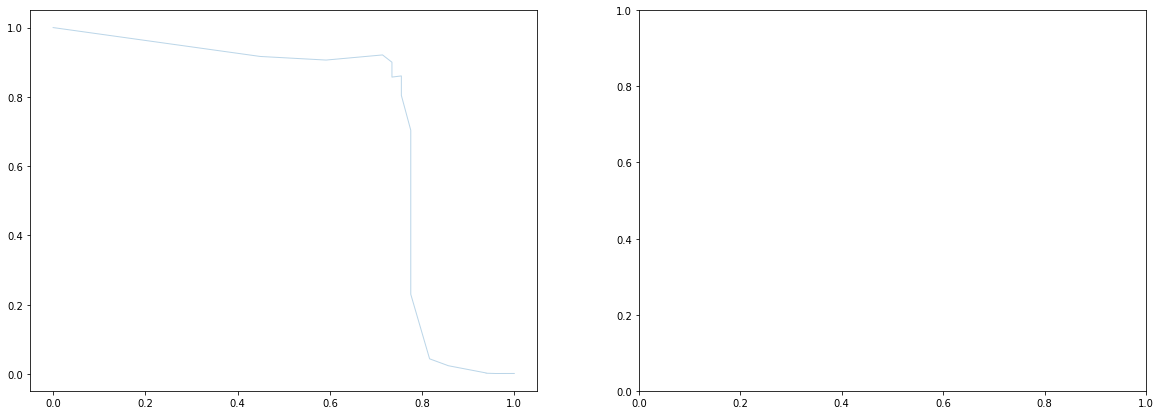

In [ ]:
results_graph_individual()

In [ ]:
#跑每个模型整合的评估图
def results_graph_all_in_one():
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
    model_name = ["CART","RF", "XGB", "LGB","DF"]
    
    # Model definition
    CARTC = DecisionTreeClassifier(criterion="entropy"
                                      ,random_state=3
                                      ,splitter="random"
                                      ,max_depth=7)
    RFC = RandomForestClassifier(random_state=3)
    XGBC = XGBClassifier(
            n_estimators=2977,
            max_depth=13,
            min_child_weight=1,
            learning_rate=0.057,
            subsample=0.82,
            colsample_bytree=0.66,
            gamma=1,
            n_jobs=-1,
            n_thread=-1,
            tree_method='gpu_hist',  #gpu_hist is really fast
            objective='binary:logistic')
    LGBC = LGBMClassifier(boosting_type='gbdt',
                              class_weight=None,
                              colsample_bytree=0.5112837457460335,
                              importance_type='split',
                              learning_rate=0.02,
                              max_depth=7,
                              metric='None',
                              min_child_samples=195,
                              min_child_weight=0.01,
                              min_split_gain=0.0,
                              n_estimators=3000,
                              n_jobs=4,
                              num_leaves=44,
                              objective=None,
                              random_state=42,
                              reg_alpha=2,
                              reg_lambda=10,
                              silent=True,
                              subsample=0.8137506311449016,
                              subsample_for_bin=200000,
                              subsample_freq=0)
    DEEPF = CascadeForestClassifier(use_predictor='True',
                                        predictor="forest",
                                        n_bins=173,n_estimators=6,
                                        n_trees=1000,
                                        min_samples_leaf=1,
                                        partial_mode='True',
                                        delta=1.4142915557953846e-05,
                                        verbose=1,
                                        random_state=33)



    for clf, m_name in zip([CARTC,RFC,XGBC,LGBC,DEEPF], model_name):
      accuracy_lst = []
      precision_lst = []
      recall_lst = []
      f1_lst = []
      y_real = []
      y_proba = []

      accuracy_lst_sm = []
      precision_lst_sm = []
      recall_lst_sm = []
      f1_lst_sm = []
      y_real_sm = []
      y_proba_sm = []

      i = 0
      sss = StratifiedKFold(n_splits=10, random_state=3, shuffle=True)
      sm = SMOTE(random_state = 1)

      # 交叉验证划分
      for train_index, test_index in sss.split(X, y):
        print("Train:", train_index, "Test:", test_index)
        X_train, X_test = X.iloc[train_index].values, X.iloc[test_index].values
        y_train, y_test = y.iloc[train_index].values, y.iloc[test_index].values
        X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
        X_test_sm = np.array(X_test)
        y_test_sm = np.array(y_test)

        if m_name != "DF" :
          model=clf.fit(X_train, y_train)
        else  :
          model=clf
          clf.fit(X_train, y_train)

        probas_ = model.predict_proba(X_test)

        y_real.append(y_test)
        y_proba.append(probas_[:, 1])
        accuracy_lst.append(accuracy_score(y_test, probas_[:, 1].round()))
        precision_lst.append(precision_score(y_test, probas_[:, 1].round()))
        recall_lst.append(recall_score(y_test, probas_[:, 1].round()))
        f1_lst.append(f1_score(y_test, probas_[:, 1].round()))

        
        if m_name != "DF" :
          model=clf.fit(X_train_sm, y_train_sm)
        else  :
          model=clf
          clf.fit(X_train_sm, y_train_sm)

        probas_ = model.predict_proba(X_test_sm)
        

        y_real_sm.append(y_test_sm)
        y_proba_sm.append(probas_[:, 1])
        accuracy_lst_sm.append(accuracy_score(y_test_sm, probas_[:, 1].round()))
        precision_lst_sm.append(precision_score(y_test_sm, probas_[:, 1].round()))
        recall_lst_sm.append(recall_score(y_test_sm, probas_[:, 1].round()))
        f1_lst_sm.append(f1_score(y_test_sm, probas_[:, 1].round()))
        

        i += 1


      y_real = np.concatenate(y_real)
      y_proba = np.concatenate(y_proba)
      

      y_real_sm = np.concatenate(y_real_sm)
      y_proba_sm = np.concatenate(y_proba_sm)

      ## 文字报告
      print("#"*25,m_name,"#"*25)
      print("Scores Before SMOTE:")
      print("average accuracy: {:.5f}".format(np.mean(accuracy_lst)))
      print("average precision: {:.5f}".format(np.mean(precision_lst)))
      print("average recall: {:.5f}".format(np.mean(recall_lst)))
      print("average f1: {:.5f}".format(np.mean(f1_lst)))

      print("-"*50)
      print("Scores After SMOTE:")
      print("average accuracy: {:.5f}".format(np.mean(accuracy_lst_sm)))
      print("average precision: {:.5f}".format(np.mean(precision_lst_sm)))
      print("average recall: {:.5f}".format(np.mean(recall_lst_sm)))
      print("average f1: {:.5f}".format(np.mean(f1_lst_sm)))




      ##画average PRC  -- Original
      precision, recall, thresholds_pr = precision_recall_curve(y_real, y_proba)
      avg_pre = average_precision_score(y_real, y_proba)
      ax1.plot(precision, recall, label = m_name+ " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.8)
      ax1.set_xlabel('Precision', fontsize = 14)
      ax1.set_ylabel('Recall', fontsize = 14)
      ax1.set_title('Cross Validated PR Curve - Original', fontsize = 18)
      ax1.legend(loc="lower left")

      ##画average PRC  -- SMOTE      
      precision, recall, thresholds_pr = precision_recall_curve(y_real_sm, y_proba_sm)
      avg_pre = average_precision_score(y_real_sm, y_proba_sm)
      ax2.plot(precision, recall, label = m_name+ " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.8)
      ax2.set_xlabel('Precision', fontsize = 14)
      ax2.set_ylabel('Recall', fontsize = 14)
      ax2.set_title('Cross Validated PR Curve - SMOTE', fontsize = 18)
      ax2.legend(loc="lower left")
      plt.tight_layout()
    # plt.show()


In [ ]:
results_graph_all_in_one()

Train: [     0      1      4 ... 284804 284805 284806] Test: [     2      3     11 ... 284771 284795 284802]
Train: [     0      1      2 ... 284804 284805 284806] Test: [    14     15     26 ... 284750 284782 284803]
Train: [     0      1      2 ... 284802 284803 284805] Test: [     5      7      8 ... 284798 284804 284806]
Train: [     0      1      2 ... 284804 284805 284806] Test: [     4      6     19 ... 284784 284785 284793]
Train: [     0      1      2 ... 284804 284805 284806] Test: [    31     85     91 ... 284753 284764 284776]
Train: [     1      2      3 ... 284804 284805 284806] Test: [     0     10     16 ... 284775 284777 284786]
Train: [     0      2      3 ... 284803 284804 284806] Test: [     1     20     36 ... 284797 284799 284805]
Train: [     0      1      2 ... 284804 284805 284806] Test: [     9     17     24 ... 284796 284800 284801]
Train: [     0      1      2 ... 284804 284805 284806] Test: [    18     35     38 ... 284745 284766 284791]
Train: [     0     

# characters selection

In [ ]:
xgb.plot_importance(xgb_model_0,max_num_features=30,importance_type='gain')

In [ ]:
X_train_dropsm = np.delete(X_train_sm, [22,23,26,24,25,13,5,29], axis=1) 
X_train_drop = np.delete(X_train, [22,23,26,24,25,13,5,29], axis=1) 